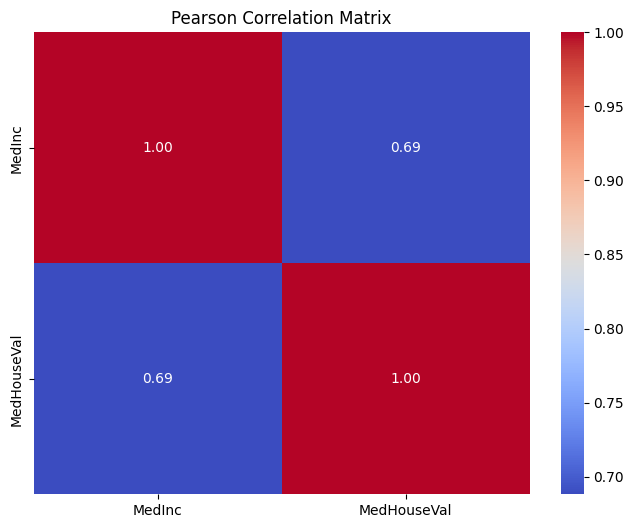

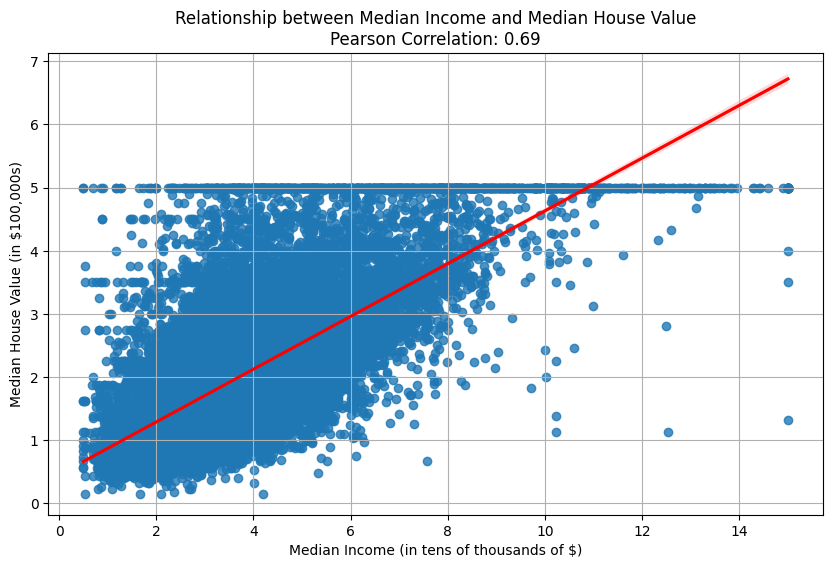

Head of the California Housing DataFrame:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Pearson Correlation Coefficient between 'MedInc' and 'MedHouseVal': 0.6881


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# --- When to Use Pearson Correlation Coefficient ---
# The Pearson Correlation Coefficient is used to measure the linear relationship between two continuous variables.
# It's a value between -1 and 1, where:
#  -  1 indicates a perfect positive linear relationship.
#  - -1 indicates a perfect negative linear relationship.
#  -  0 indicates no linear relationship.
#
# --- Data Requirements ---
# 1. Continuous Variables: Both variables should be continuous (i.e., interval or ratio level).
# 2. Linearity: The relationship between the variables should be linear. You can check this with a scatter plot.
# 3. Normality: The variables should be approximately normally distributed.
# 4. No Outliers: Significant outliers can distort the correlation coefficient.

# 1. FIND AND LOAD A RELEVANT DATASET FROM SCIKIT-LEARN
# We'll use the California Housing dataset, which contains continuous variables suitable for this analysis.
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# 2. SELECT FEATURES TO WORK WITH
# We will examine the relationship between the median income of households ('MedInc')
# and the median house value for California districts ('MedHouseVal').
feature1 = 'MedInc'
feature2 = 'MedHouseVal'
selected_df = df[[feature1, feature2]]

# 3. APPLY THE PEARSON CORRELATION COEFFICIENT
# We can calculate the correlation matrix for the selected features.
correlation_matrix = selected_df.corr(method='pearson')
correlation_coefficient = correlation_matrix.loc[feature1, feature2]

# 4. SHOW THE RESULT
# A heatmap is a great way to visualize the correlation matrix.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()

# We can also create a scatter plot to visualize the relationship directly.
plt.figure(figsize=(10, 6))
sns.regplot(x=feature1, y=feature2, data=df, line_kws={"color":"red"})
plt.title(f'Relationship between Median Income and Median House Value\nPearson Correlation: {correlation_coefficient:.2f}')
plt.xlabel('Median Income (in tens of thousands of $)')
plt.ylabel('Median House Value (in $100,000s)')
plt.grid(True)
plt.show()


# 5. PRINT THE HEAD OF THE RESULTING DATAFRAME
# We will just show the head of the original dataframe with the target variable.
print("Head of the California Housing DataFrame:")
print(df.head())

print(f"\nPearson Correlation Coefficient between '{feature1}' and '{feature2}': {correlation_coefficient:.4f}")
